Parameters of the best solution : [1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
Fitness value of the best solution = -0.0
Predicted output based on the best solution : 252.0


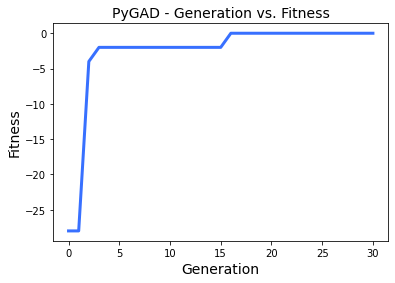

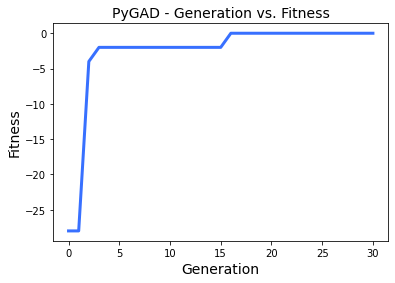

In [8]:
import pygad
import numpy
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]
#definiujemy funkcję fitness

def fitness_func(solution, solution_idx):
    sum1 = numpy.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = numpy.sum(solution_invert * S)
    fitness = -numpy.abs(sum1-sum2)
    #lub: fitness = 1.0 / (1.0 + numpy.abs(sum1-sum2))
    return fitness
fitness_function = fitness_func
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)
#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2
#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"
#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"
#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
#uruchomienie algorytmu
ga_instance.run()
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(S*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))
#wyswietlenie wykresu:z
ga_instance.plot_fitness()